In [1]:
import INMET
inmet = INMET.api_inmet()

In [2]:
# Questão 1 - a
lista_estacoes_automaticas = inmet.requisita_estacoes(tipo='M')
serie_de_14_dias = inmet.requisita_diario(data_inicial='2021-09-01', data_final='2021-09-15', cod_estacao='A301')

In [ ]:
# print saídas
lista_estacoes_automaticas

In [ ]:
# print saídas
serie_de_14_dias

# CONVERSÃO PARA DATAFRAME

In [4]:
import json
import pandas as pd

In [5]:
estacoes_json = json.loads(lista_estacoes_automaticas)
serie_json = json.loads(serie_de_14_dias)


df_estacoes = pd.DataFrame.from_dict(estacoes_json)
df_serie = pd.DataFrame.from_dict(serie_json)

In [6]:
#print de dataframes
df_serie
df_estacoes

,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
0,0-2000-0-82989,AGUA BRANCA,N,None,Operante,Convencional,-9.26472222,0-76-0-2700102000W82989,03,603.42,AL,INMET,82989,-37.93805555,1928-05-04T21:00:00.000-03:00
1,0-2000-0-83007,ALTO DA BOA VISTA,N,None,Operante,Convencional,-22.96583333,0-76-0-3304557000W83007,06,347.1,RJ,INMET,83007,-43.27916666,1966-05-31T21:00:00.000-03:00
2,0-2000-0-82590,APODI,N,None,Operante,Convencional,-5.62666666,0-76-0-2401008000W82590,03,131.37,RN,INMET,82590,-37.815,1962-12-17T21:00:00.000-03:00
3,0-2000-0-83442,ARACUAI,N,None,Operante,Convencional,-16.84888888,0-76-0-3103405000W83442,05,317.67,MG,INMET,83442,-42.06083333,1918-09-05T21:00:00.000-03:00
4,0-2000-0-83368,ARAGARCAS,N,None,Operante,Convencional,-15.9025,0-76-0-5201702000W83368,10,327.03,GO,INMET,83368,-52.24527777,1970-07-18T21:00:00.000-03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0-2000-0-83428,UNAI,N,None,Operante,Convencional,-16.36638888,0-76-0-3170404000W83428,05,595.59,MG,INMET,83428,-46.88944444,1976-04-06T21:00:00.000-03:00
168,0-2000-0-83648,VITORIA,S,None,Operante,Convencional,-20.31583333,0-76-0-3205309000W83648,06,36.2,ES,INMET,83648,-40.31694443,1923-11-19T21:00:00.000-03:00
169,0-2000-0-83344,VITORIA DA CONQUISTA,N,None,Operante,Convencional,-14.88638888,0-76-0-2933307000W83344,04,879.47,BA,INMET,83344,-40.80138888,1935-12-31T21:00:00.000-03:00
170,0-2000-0-83623,VOTUPORANGA,N,None,Operante,Convencional,-20.43972221,0-76-0-3557105000W83623,07,510.41,SP,INMET,83623,-49.9836111,1976-07-04T21:00:00.000-03:00


# Requisições assíncronas

In [7]:
# lista das 15 estações a serem requisitadas
estacoes = df_estacoes['CD_ESTACAO'][0:14].values
estacoes

array(['82989', '83007', '82590', '83442', '83368', '82659', '83579',
       '82890', '82696', '83384', '83049', '82460', '83980', '82768'],
      dtype=object)

In [8]:
#import threading
import concurrent.futures

In [9]:
def requisita_diario_assincrono(codigo_estacao:str) -> str:
    """Função auxiliar na requisição assincrona dos dados de estação do INMET

    Args:
        codigo_estacao (str): Código da estação catalogada no INMET.
    
    Notes:
        Esta função teve suas datas fixadas. Apenas por questão de velocidade da sua construção.

    Returns:
        str: Dados requisitados da estação 
    """
    print("Thread %s: Iniciando", codigo_estacao)
    serie_14_dias = inmet.requisita_diario(data_inicial='2021-09-01', data_final='2021-09-15', cod_estacao=codigo_estacao)
    print("Thread %s: Finalizando", codigo_estacao)
    
    return serie_14_dias

In [10]:
with concurrent.futures.ThreadPoolExecutor(max_workers=15) as executor:
        requisicoes = executor.map(requisita_diario_assincrono, estacoes)

Thread %s: Iniciando 82989
Thread %s: Iniciando Thread %s: Iniciando 82590
83007
Thread %s: Iniciando 83442
Thread %s: Iniciando 83368
Thread %s: Iniciando 82659
Thread %s: Iniciando 83579
Thread %s: Iniciando 82890
Thread %s: Iniciando 82696
Thread %s: Iniciando 83384
Thread %s: Iniciando 83049
Thread %s: Iniciando 82460
Thread %s: Iniciando 83980
Thread %s: Iniciando 82768
Thread %s: Finalizando 82989
Thread %s: FinalizandoThread %s: Finalizando 82659
 83049
Thread %s: Finalizando 83384
Thread %s: Finalizando 83980
Thread %s: Finalizando 83442
Thread %s: Finalizando 82696
Thread %s: Finalizando 82768
Thread %s: Finalizando 82460
Thread %s: Finalizando 83579
Thread %s: Finalizando 83007
Thread %s: FinalizandoThread %s: Finalizando 82890 82590

Thread %s: Finalizando 83368


In [11]:
saidas_requisicao = {}
for codigo_posto, requisicao in zip(estacoes, requisicoes):
    saidas_requisicao[codigo_posto] = requisicao

In [12]:
# exemplo de pedaço da dict com os dados baixados
saidas_requisicao['82989']

b'[{"TEMP_MAX":"26.8","UMID_MED":"84","UF":"AL","DT_MEDICAO":"2021-09-01","DC_NOME":"AGUA BRANCA","TEMP_MED":"21.18","CHUVA":"0","INSOLACAO":"4.6","CD_ESTACAO":"82989","VL_LATITUDE":"-9.26472222","VL_LONGITUDE":"-37.93805555","TEMP_MIN":"17.6"},{"TEMP_MAX":"26.6","UMID_MED":"86","UF":"AL","DT_MEDICAO":"2021-09-02","DC_NOME":"AGUA BRANCA","TEMP_MED":"21.66","CHUVA":"0","INSOLACAO":"9.6","CD_ESTACAO":"82989","VL_LATITUDE":"-9.26472222","VL_LONGITUDE":"-37.93805555","TEMP_MIN":"17.1"},{"TEMP_MAX":"28.4","UMID_MED":"87","UF":"AL","DT_MEDICAO":"2021-09-03","DC_NOME":"AGUA BRANCA","TEMP_MED":"22.48","CHUVA":"0","INSOLACAO":"8.5","CD_ESTACAO":"82989","VL_LATITUDE":"-9.26472222","VL_LONGITUDE":"-37.93805555","TEMP_MIN":"17.9"},{"TEMP_MAX":"29.7","UMID_MED":"81","UF":"AL","DT_MEDICAO":"2021-09-04","DC_NOME":"AGUA BRANCA","TEMP_MED":"23.8","CHUVA":"0","INSOLACAO":"10.4","CD_ESTACAO":"82989","VL_LATITUDE":"-9.26472222","VL_LONGITUDE":"-37.93805555","TEMP_MIN":"18.5"},{"TEMP_MAX":null,"UMID_MED":n

# Verifica falhas

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

def plot_falhas(df:pd.DataFrame, codigo_posto:str=None) -> plt:
    """Sub-função de checa_falhas(). 
    Gera visualização de todos os dados existentes e faltantes na série da estação.

    Args:
        df (pd.DataFrame): Dados trabalhados do posto
        codigo_posto (str, optional): código do posto. Defaults to None.

    Returns:
        plt: Figura representando as falhas
    """
    
    fig, ax = plt.subplots(figsize=(18, 12))
    
    titulo = 'Falha nos dados' if codigo_posto == None else f'Falha nos dados do posto {codigo_posto}'
    ax.set_title(titulo, fontsize=20,loc='center')
    myFmt = mdates.DateFormatter('%Y')
    ax.set_ylabel(myFmt)

    sns.heatmap(df.isnull(), cbar=False)

In [14]:
def checa_falhas(dados_estacao:str, plot:bool=False, codigo_posto:str=None) -> None:
    """Verifica em todas as variáveis de uma estação INMET se há falhas.

    Args:
        dados_estacao (str): dados requisitados diretamente da api
        plot (bool, optional): [True ou False] Habilita visualização gráfica. Defaults to False.
        codigo_posto (str, optional): Código do posto para títulos e etc. Defaults to None.
    """
    
    # Conversão do dado bruto para json e de json para DataFrame
    serie_json = json.loads(dados_estacao)
    df = pd.DataFrame.from_dict(serie_json)
    
    # Setando a data como índice
    df = df.set_index('DT_MEDICAO')
    
    # Verificando se há falhas
    falhas = df.isna()
    if falhas.bool:
        print(f'A estação apresenta falhas') if codigo_posto == None else print(f'A estação {codigo_posto} apresenta falhas') 
        grafico = plot_falhas(df,codigo_posto) if plot else print('Plot de falhas ignorado')
        
    else:
        print(f'A estação está maneirinha :)') if codigo_posto == None else print(f'A estação {codigo_posto} está maneirinha :)')

A estação 82989 apresenta falhas


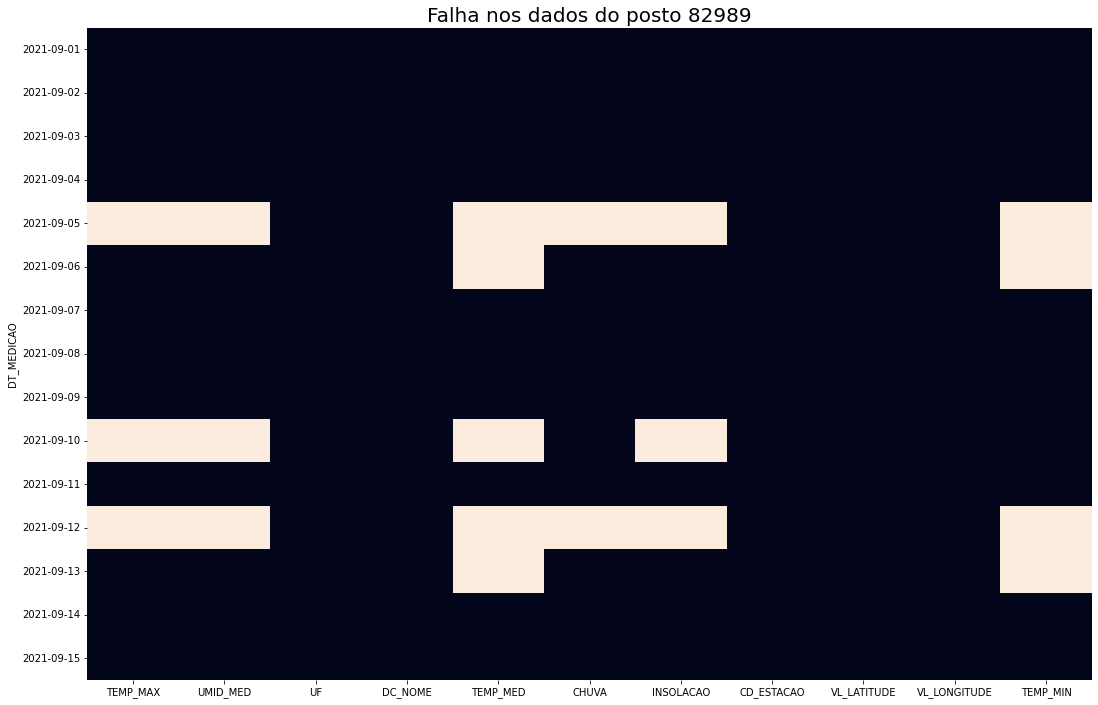

In [15]:
# exemplo
checa_falhas(saidas_requisicao['82989'], plot=True, codigo_posto='82989')

# Verifica valores espúrios

In [16]:
serie_json = json.loads(saidas_requisicao['82989'])
df = pd.DataFrame.from_dict(serie_json)

# Olhando colunas que devem ser checadas
print(df.columns)

range_temperatura = {'minimo_confiavel':-50,
                     'maximo_confiavel':60}
range_umidade = {'minimo_confiavel':0,
                 'maximo_confiavel':100}
range_chuva = {'minimo_confiavel':0,
               'maximo_confiavel':1} #range de chuva alterado para ser pego como espúrio

# outras colunas como a insolação podem ser incluídas no mesmo padrão.
# isso não foi feito por nao ter noção dos limites para essa variável.

Index(['TEMP_MAX', 'UMID_MED', 'UF', 'DT_MEDICAO', 'DC_NOME', 'TEMP_MED',
       'CHUVA', 'INSOLACAO', 'CD_ESTACAO', 'VL_LATITUDE', 'VL_LONGITUDE',
       'TEMP_MIN'],
      dtype='object')


In [17]:
def checa_valores_espurios(dados_estacao:str, codigo_posto:str=None, retorna_msg_ok:bool=False) -> None:
    """Checa se existem valores fora de um intervalo definido.

    Args:
        dados_estacao (str): dados da estação requisitados diretamente da api
        codigo_posto (str, optional): Código do posto para prints. Defaults to None.
        retorna_msg_ok (bool, optional): Habilita maensagens de sucesso (além das de erro). Defaults to False.
    """
    
    relacao_colunas_para_ranges = {'TEMP_MAX':range_temperatura,
                                   'UMID_MED':range_umidade,
                                   'TEMP_MED':range_temperatura,
                                   'CHUVA':range_chuva,
                                   'TEMP_MIN':range_temperatura}

    serie_json = json.loads(dados_estacao)
    df = pd.DataFrame.from_dict(serie_json)
    
    for coluna in relacao_colunas_para_ranges:

        valores = pd.to_numeric(df[coluna])
        if (valores < relacao_colunas_para_ranges[coluna]['minimo_confiavel']).any() or (valores > relacao_colunas_para_ranges[coluna]['maximo_confiavel']).any():
            print("Tem valor estranho aqui, Jovem ( '-')")
            print(f'>>>>>> codigo do posto: {codigo_posto}') if codigo_posto != None else 'faz nada :p'
            print(f'>>>>>> Variável: {coluna}')
        
        else:
            nome_para_posto = codigo_posto if codigo_posto != None else ''
            print(f'Tudo certo com o posto {nome_para_posto} | {coluna}') if retorna_msg_ok else "faz outro nada ('-' )"


In [18]:
# EXEMPLO
checa_valores_espurios(saidas_requisicao['82989'], '82989', True)

Tudo certo com o posto 82989 | TEMP_MAX
Tudo certo com o posto 82989 | UMID_MED
Tudo certo com o posto 82989 | TEMP_MED
Tem valor estranho aqui, Jovem ( '-')
>>>>>> codigo do posto: 82989
>>>>>> Variável: CHUVA
Tudo certo com o posto 82989 | TEMP_MIN


# PLOT

In [19]:
import matplotlib.pyplot as plt

In [21]:
estacao1 = inmet.requisita_diario(data_inicial='2021-09-01', data_final='2021-09-15', cod_estacao='A301')
estacao2 = inmet.requisita_diario(data_inicial='2021-09-01', data_final='2021-09-15', cod_estacao='82590')

In [22]:
json1 = json.loads(estacao1)
json2 = json.loads(estacao2)

df1 = pd.DataFrame.from_dict(json1)
df2 = pd.DataFrame.from_dict(json2)

In [23]:
# TRATAMENTO DE DADOS
periodo = pd.date_range(start='2021-09-01',end='2021-09-15',freq='D')

dados1 = pd.to_numeric(df1['UMID_MED'], downcast="float")
dados2 = pd.to_numeric(df2['UMID_MED'], downcast="float")

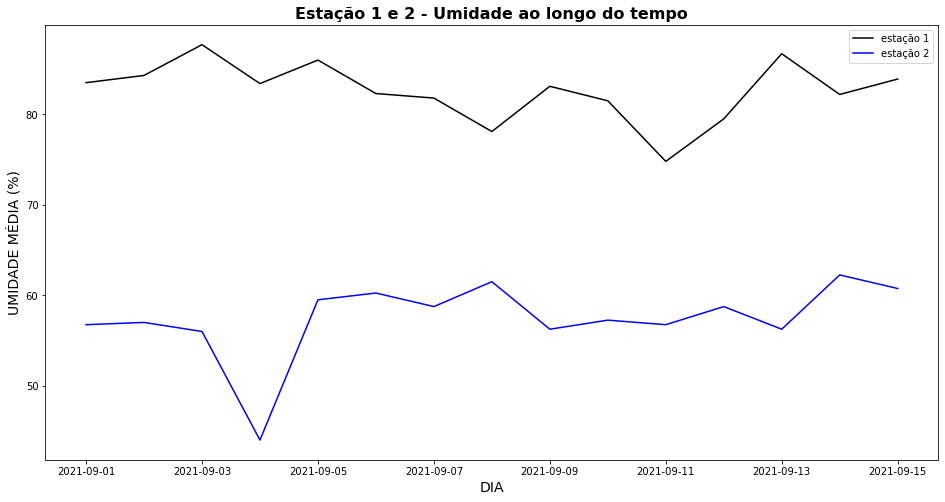

In [24]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(periodo, dados1, 'k', label='estação 1')
ax.plot(periodo, dados2, 'b', label='estação 2')
ax.set_ylabel('UMIDADE MÉDIA (%)', fontsize=14)
ax.set_xlabel('DIA', fontsize=14)
ax.set_title(f'Estação 1 e 2 - Umidade ao longo do tempo', fontsize=16, weight='bold')

plt.legend()